In [1]:
import pandas as pd
from bcb import sgs,currency
from datetime import date
from budget import return_cenarios_risco
import os
from setup import multithread,adlsFileSystemClient
import numpy as np

In [2]:
def absolute(serie):
    valor_atual = 1598.41
    yield valor_atual
    for valor in serie[:-1]:
        valor = valor / 100
        valor_atual += (valor_atual * valor)
        yield valor_atual

<AxesSubplot:title={'center':'Simulação Inflação'}>

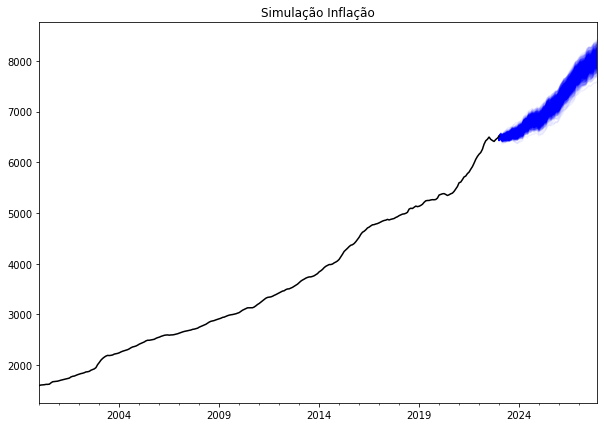

In [3]:
ipca = sgs.get({'ipca':433},start = '2000-01-01')
ipca['ipca'] = [valor for valor in absolute(ipca['ipca'].values)]
cen_df = return_cenarios_risco('INFLACAO')
df = pd.concat([ipca,cen_df],axis = 1)
df.plot.line(figsize = (10,7),legend = False,title = 'Simulação Inflação',color = '#0000FF10')
df['ipca'].plot.line(figsize = (10,7),legend = False,title = 'Simulação Inflação',color = 'black')

<AxesSubplot:title={'center':'Simulação Câmbio'}>

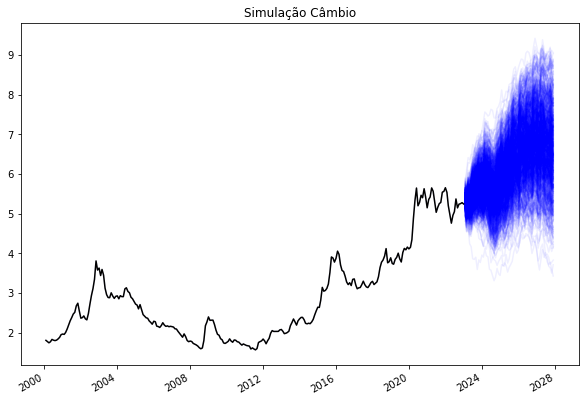

In [4]:
cy = currency.get('USD', start = '2000-01-01',end = str(date.today())).resample('m').mean().iloc[:-2]
cen_df = return_cenarios_risco('CAMBIO')
df = pd.concat([cy,cen_df],axis = 1)
df.plot.line(figsize = (10,7),legend = False,title = 'Simulação Câmbio',color = '#0000FF10')
df['USD'].plot.line(figsize = (10,7),legend = False,title = 'Simulação Câmbio',color = 'black')

<AxesSubplot:title={'center':'Simulação Juros'}>

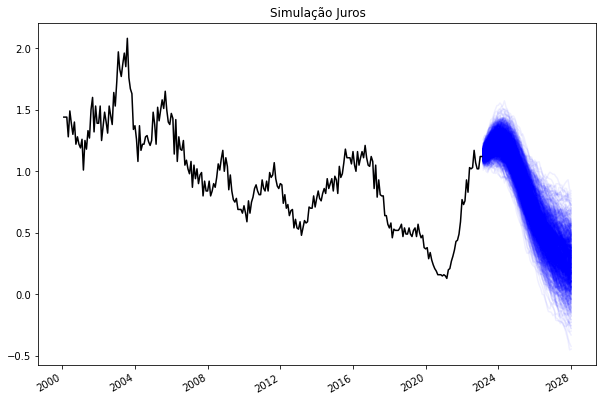

In [7]:
cdi = sgs.get({'cdi':4391},start = '2000-01-01').resample('m').mean().iloc[:-1]
cen_df = return_cenarios_risco('JUROS')
forecast = cen_df.mean(axis = 1)
df = pd.concat([cdi,cen_df],axis = 1)
df.plot.line(figsize = (10,7),legend = False,title = 'Simulação Juros',color = '#0000FF10')
df['cdi'].plot.line(figsize = (10,7),legend = False,title = 'Simulação Juros',color = 'black')

<AxesSubplot:title={'center':'Simulação GSF'}>

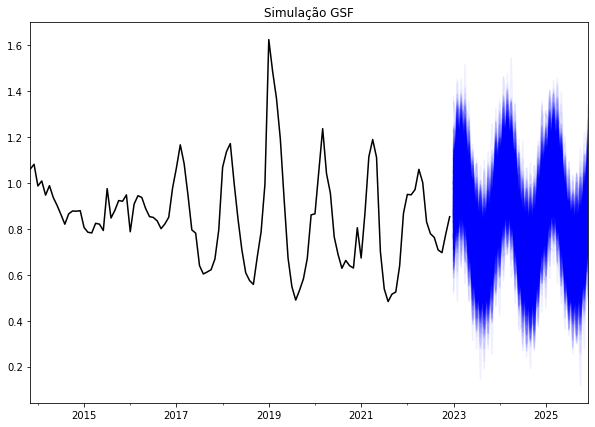

In [2]:
multithread.ADLDownloader(adlsFileSystemClient, lpath='gsf.csv', 
        rpath='DataLakeRiscoECompliance/DadosEnergiaCCEE/gsf.csv', nthreads=64, 
        overwrite=True, buffersize=4194304, blocksize=4194304)
gsf = pd.read_csv('gsf.csv',index_col = 'index',parse_dates = True)
os.remove('gsf.csv')
gsf['gsf'] = gsf['Geração'] / gsf['Garantia Física']
gsf = gsf[['gsf']]
cen_df = return_cenarios_risco('GSF')
df = pd.concat([gsf,cen_df],axis = 1)
df.plot.line(figsize = (10,7),legend = False,title = 'Simulação GSF',color = '#0000FF10')
df['gsf'].plot.line(figsize = (10,7),legend = False,title = 'Simulação GSF',color = 'black')